In [82]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random

import warnings
warnings.filterwarnings('ignore')

In [130]:
# Levanto los datos

df = pd.read_csv('../data/temperaturas_catedra/GlobalLandTemperaturesByCity.csv', parse_dates=['dt'])
df_lat_long = pd.read_csv('../data/long_lat/cities_lat_long.csv')



df = pd.merge(df, df_lat_long, on='City')

df = df[(df['lng'] < -56) & (df['lng'] > -58) & (df['lat'] < 10) & (df['lat'] > -40)]


df = df.dropna(axis=1, how='any')
df = df.drop('iso2',1)
df = df.drop('iso3', 1)
df = df.drop('pop', 1)
df = df.drop('Latitude', 1)
df = df.drop('Longitude', 1)
df

,dt,City,Country_x,city_ascii,lat,lng,Country_y,province
1052253,1855-05-01,Concepcion,Chile,Concepcion,-23.406389,-57.434412,Paraguay,Concepción
1052255,1855-06-01,Concepcion,Chile,Concepcion,-23.406389,-57.434412,Paraguay,Concepción
1052257,1855-07-01,Concepcion,Chile,Concepcion,-23.406389,-57.434412,Paraguay,Concepción
1052259,1855-08-01,Concepcion,Chile,Concepcion,-23.406389,-57.434412,Paraguay,Concepción
1052261,1855-09-01,Concepcion,Chile,Concepcion,-23.406389,-57.434412,Paraguay,Concepción
1052263,1855-10-01,Concepcion,Chile,Concepcion,-23.406389,-57.434412,Paraguay,Concepción
1052265,1855-11-01,Concepcion,Chile,Concepcion,-23.406389,-57.434412,Paraguay,Concepción
1052267,1855-12-01,Concepcion,Chile,Concepcion,-23.406389,-57.434412,Paraguay,Concepción
1052269,1856-01-01,Concepcion,Chile,Concepcion,-23.406389,-57.434412,Paraguay,Concepción
1052271,1856-02-01,Concepcion,Chile,Concepcion,-23.406389,-57.434412,Paraguay,Concepción


In [132]:
# Gráficos los datos


df['month'] = pd.DatetimeIndex(df3['dt']).month

#df = df.groupby(['month', 'city']).mean().reset_index()

#df = df[(df['month'] == 12) & (df['city'] != 'La Plata')]

#cityToPredict = df[(df['city']=='La Plata') & (df['month'] == 12)]

#grouped = df5



#if not cityToPredict.isin(samples)['city'].all():  
    #df5 = df5[df5['city'].isin(citiesToTrain)]
#    df6 = df5.groupby(['year']).mean()
#else:
#    print('NOPE.')

    
#df6

#grouped = df2.groupby(['year']).mean().reset_index()

#ax = sns.tsplot(data=grouped['AverageTemperature'], time=grouped['lat'], interpolate=False)
#sns.plt.show()

ValueError: Length of values does not match length of index

In [81]:
print("Decripción de los datos")
print(df3.describe())

print("\nLas primeras 8 filas de los datos")
print(df3.head(10))

Decripción de los datos
       AverageTemperature  AverageTemperatureUncertainty           lat  \
count        35544.000000                   35544.000000  36090.000000   
mean            18.626855                       0.575394    -23.475904   
std              6.233221                       0.473896     13.866551   
min              4.796000                       0.060000    -37.665519   
25%             13.373000                       0.231000    -34.660017   
50%             19.889000                       0.370000    -29.139528   
75%             24.551000                       0.815000    -15.219602   
max             29.499000                       5.021000      8.199976   

                lng           pop          year  
count  36090.000000  36090.000000  36090.000000  
mean     -59.534161  31203.044846   1929.244722  
std        0.295828  32177.203281     49.060447  
min      -59.950021    -99.000000   1824.000000  
25%      -59.800030   2972.000000   1888.000000  
50%      

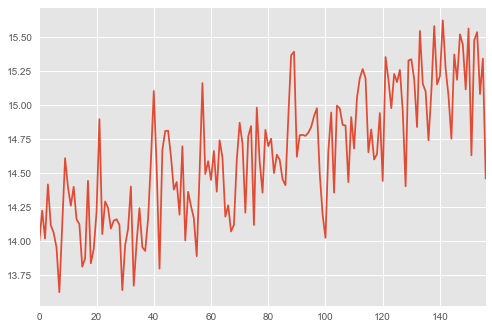

In [5]:
# Limpio los outliers

def mascara_outliers(s):
    return abs(s - s.mean()) <= 2*s.std()
    
mascara = mascara_outliers(grouped['AverageTemperature'])
grouped = grouped[mascara]
sns.tsplot(data=grouped['AverageTemperature'], interpolate=True)
sns.plt.show()

In [1]:
# Uso cuadrados mínimos para predecir
sns.tsplot(data=grouped['AverageTemperature'], time=grouped['year'], interpolate=True, color='b')


def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([t^4, t^3, t^2, t, 1, np.sin(t)])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)

    # Entreno el modelo
    df_e = df[df['year'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['year'])
    regr.fit(A_e, df_e['AverageTemperature'])

    # Me fijo la aproximación que se realizó
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')

    # Realizo predicciones
    df_p = df[df['year'].isin(rango_prediccion)]

    A_p = armar_matriz_A(df_p['year'])
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['year'], data=df_p['p'], color='g')

    ECM = sum((df_p['p']-df_p['AverageTemperature'])**2)
    return ECM

def predecir(k):
    return entrenar_y_predecir_en_rangos(grouped, range(k-20,k), range(k,k+20))
    
ECM = predecir(1970)
print("Error de predicción: {:.2f}".format(ECM))
#ECM = predecir(50)
#print("Error de predicción: {:.2f}".format(ECM))
#ECM = predecir(30)
#print("Error de predicción: {:.2f}".format(ECM))
    
sns.plt.xlim((1970,2000))
sns.plt.show()

NameError: name 'sns' is not defined












# Y si no es una seria de tiempo? 

In [12]:
# Un par de cosas más de pandas

years = [2004]*6 + [2005]*6 + [2006]*6
delays = list(np.random.randn(6)+80) + list(np.random.randn(6)+5) + list(np.random.randn(6)+50)
delays[2] = 5
delays[7] = 80

df1 = pd.DataFrame({
    'year': years,
    'delay': delays
})

df1

,delay,year
0,80.821911,2004
1,81.994264,2004
2,5.000000,2004
3,77.742141,2004
4,80.080482,2004
5,80.356484,2004
6,4.082986,2005
7,80.000000,2005
8,5.537343,2005
9,5.836535,2005


In [13]:
# Groupby y sacar outliers

mascara = df1.groupby('year')['delay'].apply(mascara_outliers)
df1 = df1[mascara]
df1

,delay,year
0,80.821911,2004
1,81.994264,2004
3,77.742141,2004
4,80.080482,2004
5,80.356484,2004
6,4.082986,2005
8,5.537343,2005
9,5.836535,2005
10,5.402303,2005
11,5.086106,2005


In [14]:
# Groupby y calcular promedio

promedio = df1.groupby('year').aggregate(['mean', 'std', 'count'])
promedio

delay                
           mean       std count
year                           
2004  80.199056  1.556117     5
2005   5.189055  0.674536     5
2006  50.300613  0.755552     6